In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from nn.src.Layers import LinearLayer, Sigmoid, Softmax
from nn.src.Networks import MLP
from nn.src.Optimizers import Adam
from nn.src.utils import DataLoader
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score

os.chdir("..")

In [3]:
from nn.src.Losses import BinaryCrossEntropy, CrossEntropyLoss

#easy
df_train, df_test = pd.read_csv("../mio1/classification/easy-training.csv"), pd.read_csv("../mio1/classification/easy-test.csv")
X_full_train, X_full_test = np.asarray(df_train.loc[:,("x","y")]) / 100, np.asarray(df_test.loc[:, ("x","y")]) / 100
y_full_train, y_full_test = np.asarray(df_train["c"]), np.asarray(df_test["c"])
dataloader = DataLoader(X_full_train,y_full_train, batch_size=10)
layers = [LinearLayer(2,5),
          Sigmoid(),
          LinearLayer(5,5),
          Sigmoid(),
          LinearLayer(5,1),
          Sigmoid()
          ]
loss = BinaryCrossEntropy()
net = MLP(layers)
optim = Adam(net.layers, lr=0.1)
for epoch in range(10**6):
    for (X,y) in dataloader:
        y_hat = net(X)
        err = loss(y,y_hat)
        gradient = loss.derriv()
        net.backward(gradient)
        optim.step()
    if not epoch % 1000:
        # plt.cla()
        print(epoch, f1_score(y_full_test, np.around(net(X_full_test))))
        # plt.scatter(X_full_train[:,0], X_full_train[:,1], c= np.around(net(X_full_train)))
        # plt.show()

0 0.9392033542976939
1000 0.9980119284294234


KeyboardInterrupt: 

0 0.40700000000000003


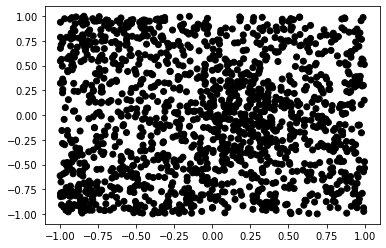

1000 0.9335


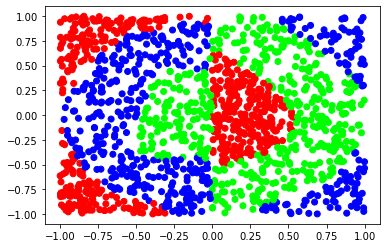

2000 0.955


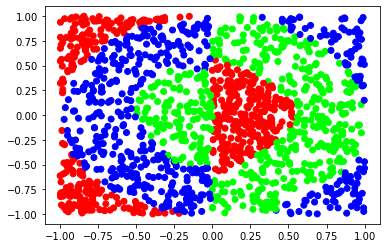

3000 0.9469999999999998


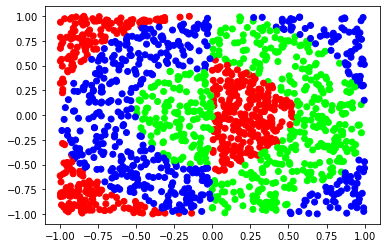

KeyboardInterrupt: 

In [5]:
df_train, df_test = pd.read_csv("../mio1/classification/rings3-regular-training.csv"), pd.read_csv("../mio1/classification/rings3-regular-test.csv")
X_full_train, X_full_test = np.asarray(df_train.loc[:,("x","y")])/100, np.asarray(df_test.loc[:, ("x","y")]) / 100
y_full_train, y_full_test = np.asarray(df_train["c"]), np.asarray(df_test["c"])
encoder = OneHotEncoder(sparse = False)
y_full_train = encoder.fit_transform(y_full_train.reshape(-1, 1))
y_full_test = encoder.transform(y_full_test.reshape(-1, 1))
dataloader = DataLoader(X_full_train,y_full_train, batch_size=100)

layers = [LinearLayer(2,5),
          Sigmoid(),
          LinearLayer(5,5),
          Sigmoid(),
          LinearLayer(5,3),
          Softmax()
          ]
loss = CrossEntropyLoss()
net = MLP(layers)
optim = Adam(net.layers, lr=0.1)
for epoch in range(10**6):
    for (X,y) in dataloader:
        y_hat = net(X)
        err = loss(y,y_hat)
        gradient = loss.derriv()
        net.backward(gradient)
        optim.step()
        # print(err)
    if not epoch % 1000:
        plt.cla()
        print(epoch, f1_score(np.argmax(y_full_test, axis=1), np.argmax(net(X_full_test), axis = 1), average = "micro") )
        plt.scatter(X_full_train[:,0], X_full_train[:,1], c= np.around(net(X_full_train)))
        plt.show()

0 0.5835694050991501


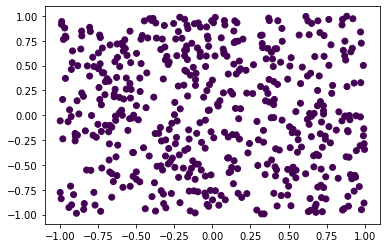

1000 0.976303317535545


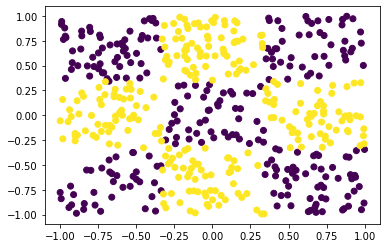

2000 0.9738717339667458


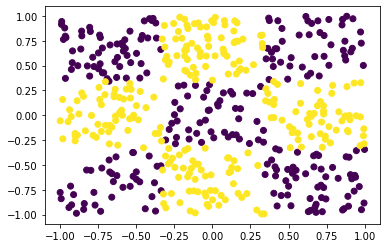

3000 0.9761904761904763


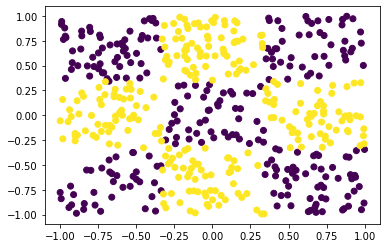

4000 0.9761904761904763


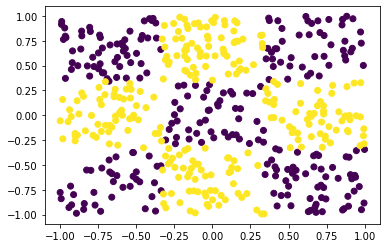

5000 0.9761904761904763


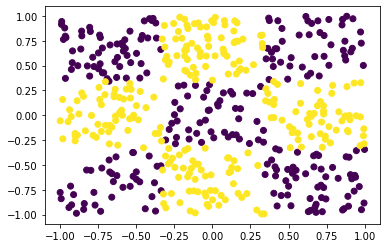

6000 0.9761904761904763


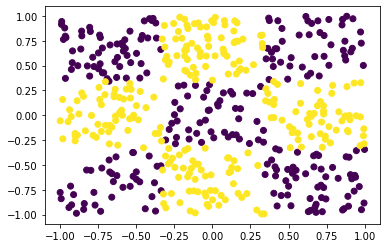

7000 0.9761904761904763


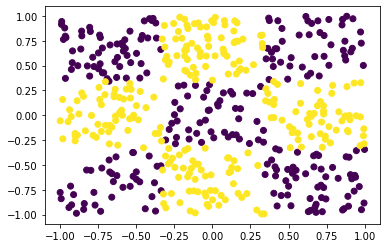

8000 0.9761904761904763


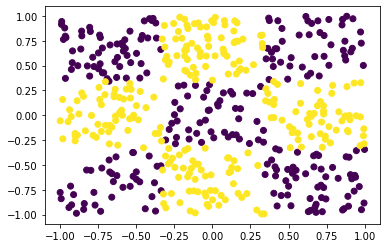

9000 0.9761904761904763


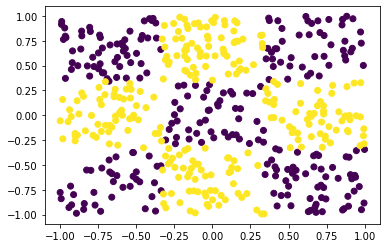

10000 0.9761904761904763


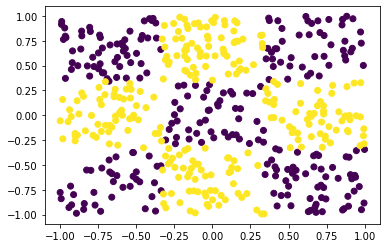

11000 0.9761904761904763


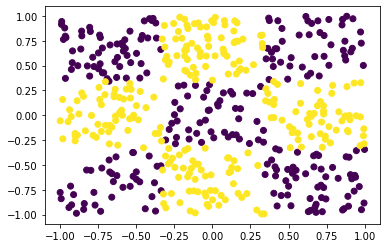

12000 0.9761904761904763


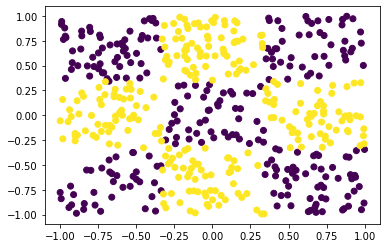

13000 0.9761904761904763


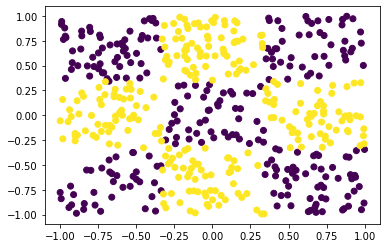

14000 0.9761904761904763


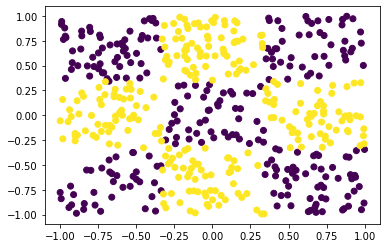

15000 0.9761904761904763


KeyboardInterrupt: 

In [19]:
df_train, df_test = pd.read_csv("../mio1/classification/xor3-training.csv"), pd.read_csv("../mio1/classification/xor3-test.csv")
X_full_train, X_full_test = np.asarray(df_train.loc[:,("x","y")])/100, np.asarray(df_test.loc[:, ("x","y")]) / 100
y_full_train, y_full_test = np.asarray(df_train["c"]), np.asarray(df_test["c"])
dataloader = DataLoader(X_full_train,y_full_train, batch_size=10**6)

layers = [LinearLayer(2,5),
          Sigmoid(),
          LinearLayer(5,5),
          Sigmoid(),
          LinearLayer(5,1),
          Sigmoid()
          ]
loss = BinaryCrossEntropy()
net = MLP(layers)
optim = Adam(net.layers, lr=0.1)
for epoch in range(10**6):
    for (X,y) in dataloader:
        y_hat = net(X)
        err = loss(y,y_hat)
        gradient = loss.derriv()
        net.backward(gradient)
        optim.step()
    if not epoch % 1000:
        plt.cla()
        print(epoch, f1_score(y_full_test, np.around(net(X_full_test))) )
        plt.scatter(X_full_train[:,0], X_full_train[:,1], c= np.around(net(X_full_train)))
        plt.show()